In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [70]:
# ============================================================
# Load raw data
# ============================================================
df_weekly = pd.read_csv("Project/Data/China/Weekly Market Information of Domestic Index165542650/IDX_Idxtrdweek.csv")
df_index  = pd.read_csv("Project/Data/China/Index Profile170027150/IDX_Idxinfo.csv")

# Ensure index code is the same type in both tables
df_weekly["Indexcd"] = df_weekly["Indexcd"].astype(str)
df_index["Indexcd"]  = df_index["Indexcd"].astype(str)

/var/folders/wp/k5t4pl853ng8y6kktqkmy3n80000gn/T/ipykernel_70216/1865490832.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weekly = pd.read_csv("Project/Data/China/Weekly Market Information of Domestic Index165542650/IDX_Idxtrdweek.csv")


In [71]:
# ============================================================
# Merge weekly quotes with index names
# ============================================================
merged_weekly = pd.merge(
    df_weekly,
    df_index[["Indexcd", "Idxinfo01_en"]],   # only the columns we need
    on="Indexcd",
    how="left"
)

# Keep only relevant columns and rename for clarity
merged_weekly = merged_weekly[["Idxinfo01_en", "Indexcd", "Week", "Clsidx"]]
merged_weekly.columns = ["EnglishName", "IndexCode", "Date", "Closing"]

display(merged_weekly.head(10))

,EnglishName,IndexCode,Date,Closing
0,SSE Composite Index,000001,1991-01,131.44
1,SSE Composite Index,000001,1991-02,134.60
2,SSE Composite Index,000001,1991-03,134.24
3,SSE Composite Index,000001,1991-04,132.05
4,SSE Composite Index,000001,1991-05,129.51
5,SSE Composite Index,000001,1991-06,130.38
6,SSE Composite Index,000001,1991-07,132.53
7,SSE Composite Index,000001,1991-08,134.87
8,SSE Composite Index,000001,1991-09,132.53
9,SSE Composite Index,000001,1991-10,129.89


In [72]:

# ============================================================
# Search for specific indices by name keyword
# ============================================================

# Ensure both columns are strings
df_index["Indexcd"] = df_index["Indexcd"].astype(str)
df_weekly["Indexcd"] = df_weekly["Indexcd"].astype(str)

# 1️⃣ Find common index codes between both datasets
common_codes = set(df_index["Indexcd"]) & set(df_weekly["Indexcd"])

# 2️⃣ Search for indices containing a specific keyword
# Example: "Biotechnology" (can be changed to "Automobile", "Energy", etc.)
search_term = "Biotechnology"
search_df = df_index[
    df_index["Idxinfo01_en"].str.contains(search_term, case=False, na=False)
]

# 3️⃣ Keep only indices that also appear in the weekly dataset
search_common_df = search_df[search_df["Indexcd"].isin(common_codes)]

print(f"✅ Found {len(search_common_df)} indices containing '{search_term}' in both datasets.")
display(search_common_df)

✅ Found 4 indices containing 'Biotechnology' in both datasets.


,Indexcd,Idxinfo01_en,Idxinfo11,Idxinfo07,Idxinfo08,Idxinfo09
242,000841,CSI 800 Pharmaceuticals and Biotechnology Index,2012-12-21,1.0,3.0,9.0
823,399993,CSI WIND Biotechnology Index,2015-05-08,1.0,3.0,9.0
887,483059,CNI Shenzhen-Hong Kong Stock Connect Biotechno...,2017-12-08,1.0,3.0,9.0
888,483060,CNI Shenzhen-Hong Kong Stock Connect Biotechno...,2017-12-08,1.0,3.0,9.0


In [73]:
# ============================================================
# Create separate DataFrames for selected indices
#    (SSE Composite + sector/subsector indices)
# ============================================================
selected_codes = {
    "SSE Composite Index": "000001",
    "SSE Information Technology Sector Index": "000039",
    "CSI 800 Pharmaceuticals & Biotechnology Index": "000841",
    "Automobile": "801880",
    "Health Care": "000037",
    "Industrials": "000034",
}

index_dfs = {}
for label, code in selected_codes.items():
    sub = merged_weekly[merged_weekly["IndexCode"] == code].copy()
    index_dfs[label] = sub
    print(f"{label}: {len(sub)} rows, {sub['Date'].min()} → {sub['Date'].max()}")
    display(sub.head(3))


SSE Composite Index: 1766 rows, 1991-01 → 2025-42


,EnglishName,IndexCode,Date,Closing
0,SSE Composite Index,000001,1991-01,131.44
1,SSE Composite Index,000001,1991-02,134.60
2,SSE Composite Index,000001,1991-03,134.24


SSE Information Technology Sector Index: 859 rows, 2009-02 → 2025-42


,EnglishName,IndexCode,Date,Closing
53318,SSE Information Technology Sector index,000039,2009-02,1257.08
53319,SSE Information Technology Sector index,000039,2009-03,1343.77
53320,SSE Information Technology Sector index,000039,2009-04,1362.14


CSI 800 Pharmaceuticals & Biotechnology Index: 658 rows, 2012-51 → 2025-42


,EnglishName,IndexCode,Date,Closing
226730,CSI 800 Pharmaceuticals and Biotechnology Index,000841,2012-51,4815.273
226731,CSI 800 Pharmaceuticals and Biotechnology Index,000841,2012-52,5055.206
226732,CSI 800 Pharmaceuticals and Biotechnology Index,000841,2013-01,4984.736


Automobile: 1306 rows, 2000-01 → 2025-42


,EnglishName,IndexCode,Date,Closing
961693,Automobile,801880,2000-01,1051.07
961694,Automobile,801880,2000-02,1010.07
961695,Automobile,801880,2000-03,1033.10


Health Care: 859 rows, 2009-02 → 2025-42


,EnglishName,IndexCode,Date,Closing
50800,SSE Health Care Sector index,000037,2009-02,1822.58
50801,SSE Health Care Sector index,000037,2009-03,1818.74
50802,SSE Health Care Sector index,000037,2009-04,1843.09


Industrials: 859 rows, 2009-02 → 2025-42


,EnglishName,IndexCode,Date,Closing
47023,SSE Industrials Sector index,000034,2009-02,1591.43
47024,SSE Industrials Sector index,000034,2009-03,1628.80
47025,SSE Industrials Sector index,000034,2009-04,1647.82


In [74]:
# ============================================================
# Helper functions to detect missing weeks
#    We assume Date is in ISO-like form 'YYYY-WW'
# ============================================================
def expected_weeks_between(min_year: int, max_year: int):
    """Return list of all ISO year-week strings between two years."""
    weeks = []
    for y in range(min_year, max_year + 1):
        # determine if the year has 52 or 53 ISO weeks
        weeks_in_year = 53 if pd.Timestamp(f"{y}-12-31").isocalendar()[1] == 53 else 52
        weeks += [f"{y}-{str(w).zfill(2)}" for w in range(1, weeks_in_year + 1)]
    return weeks

def missing_weeks_df(df: pd.DataFrame, label: str = None) -> pd.DataFrame:
    """Return a DataFrame with all missing weeks for the given index."""
    if df.empty:
        return pd.DataFrame(columns=["IndexName","IndexCode","Year","Week","YearWeek","WeekStart","Month"])
    tmp = df.copy()
    tmp[["Year", "Week"]] = tmp["Date"].astype(str).str.split("-", expand=True).astype(int)
    min_year, max_year = tmp["Year"].min(), tmp["Year"].max()
    expected = set(expected_weeks_between(min_year, max_year))
    observed = set(tmp["Date"].astype(str).unique())
    missing = sorted(expected - observed)

    rows = []
    for yw in missing:
        y, w = map(int, yw.split("-"))
        week_start = date.fromisocalendar(y, w, 1)  # Monday
        rows.append({
            "IndexName": label or tmp["EnglishName"].iloc[0],
            "IndexCode": tmp["IndexCode"].iloc[0],
            "Year": y,
            "Week": w,
            "YearWeek": yw,
            "WeekStart": pd.Timestamp(week_start),
            "Month": week_start.month
        })
    return pd.DataFrame(rows)

# Collect missing weeks for the most relevant indices
missing_list = [
    missing_weeks_df(df, label=name)
    for name, df in index_dfs.items()
]
missing_all = pd.concat(missing_list, ignore_index=True)
display(missing_all.head())

# Aggregate missing weeks (overall)
freq_week_overall = (missing_all
                     .groupby("Week")
                     .size()
                     .reset_index(name="count")
                     .sort_values("count", ascending=False))
print("Top missing ISO weeks (all indices):")
display(freq_week_overall.head(15))


,IndexName,IndexCode,Year,Week,YearWeek,WeekStart,Month
0,SSE Composite Index,000001,1994,6,1994-06,1994-02-07,2
1,SSE Composite Index,000001,1995,5,1995-05,1995-01-30,1
2,SSE Composite Index,000001,1996,8,1996-08,1996-02-19,2
3,SSE Composite Index,000001,1996,9,1996-09,1996-02-26,2
4,SSE Composite Index,000001,1997,6,1997-06,1997-02-03,2


Top missing ISO weeks (all indices):


,Week,count
39,40,55
4,5,26
5,6,22
6,7,22
3,4,16
48,49,7
46,47,7
42,43,7
43,44,7
44,45,7


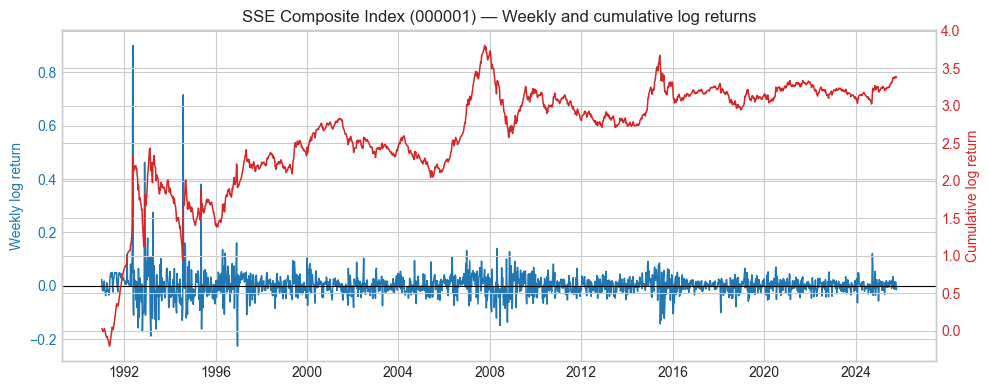

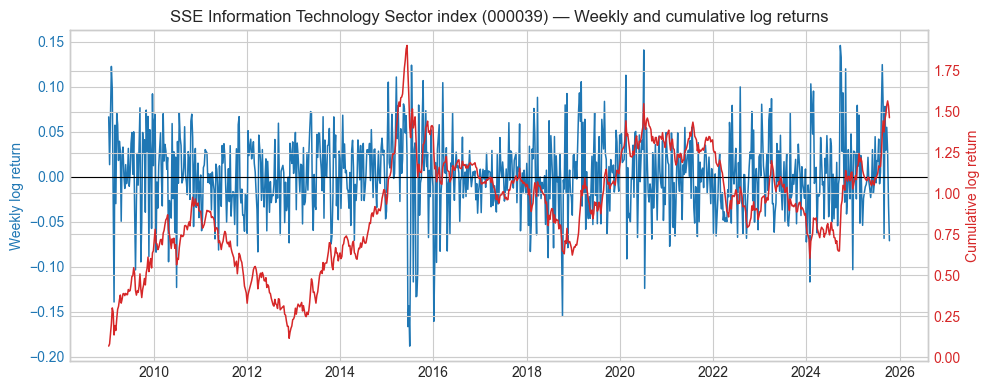

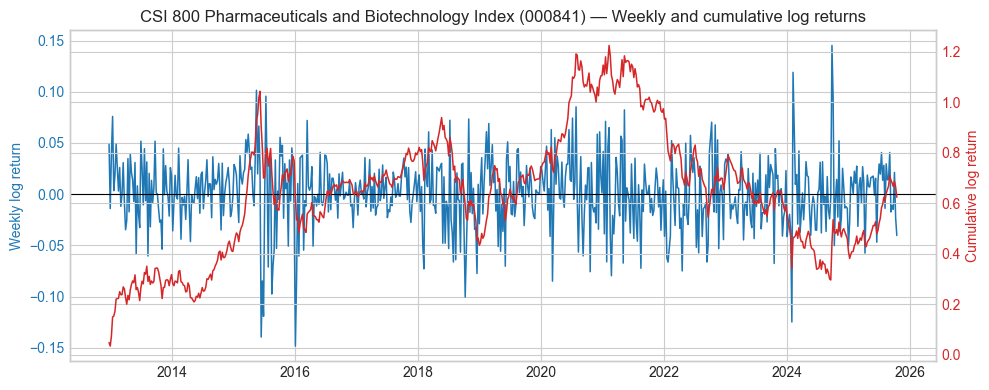

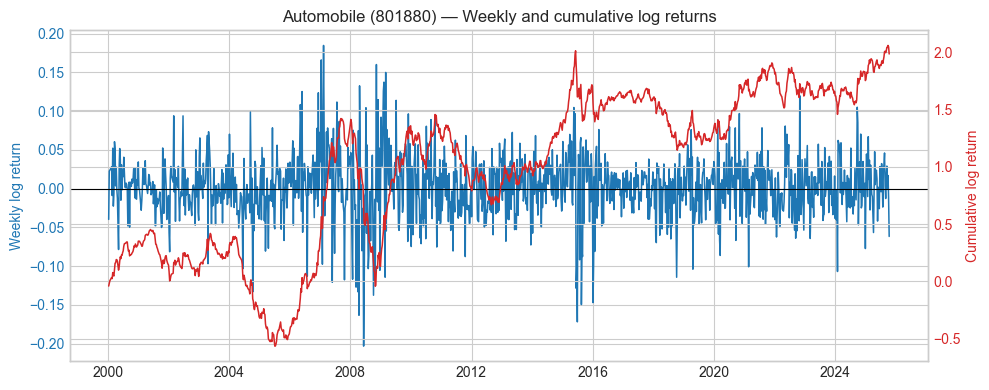

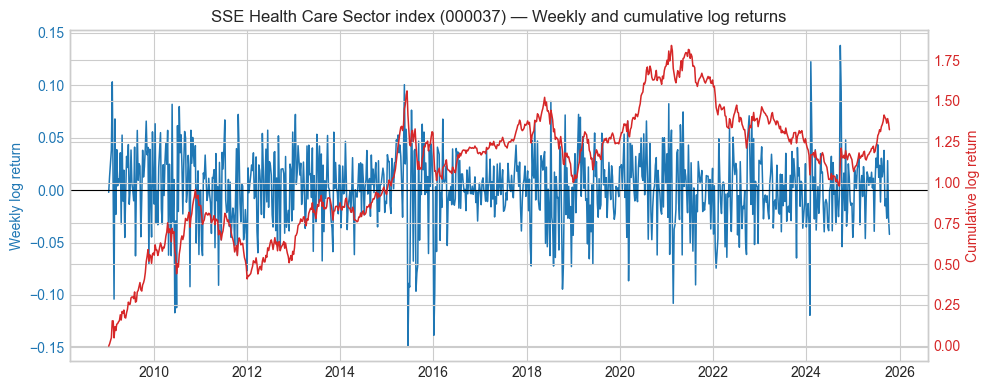

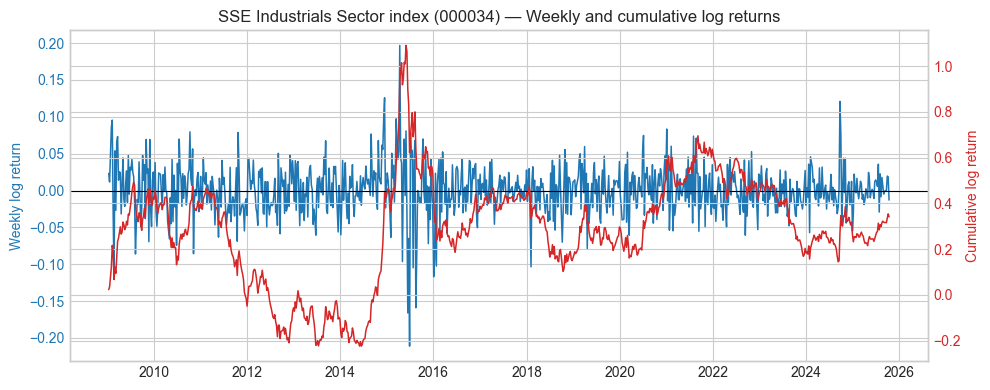

In [75]:
# ============================================================
# Compute weekly and cumulative log returns
# ============================================================
wk = merged_weekly.copy()
wk["Closing"] = pd.to_numeric(wk["Closing"], errors="coerce")
wk.loc[wk["Closing"] <= 0, "Closing"] = np.nan

wk[["Year", "Week"]] = wk["Date"].astype(str).str.split("-", expand=True).astype(int)
wk = wk.sort_values(["IndexCode", "Year", "Week"])

wk["LogReturn"] = np.log(wk["Closing"]).groupby(wk["IndexCode"]).diff()
wk["CumLogReturn"] = wk.groupby("IndexCode")["LogReturn"].cumsum()

wk["WeekStart"] = wk.apply(lambda r: pd.Timestamp.fromisocalendar(r["Year"], r["Week"], 1), axis=1)
wk = wk.dropna(subset=["LogReturn"])

# Plot weekly vs. cumulative log returns per index
plt.style.use("seaborn-v0_8-whitegrid")
target_codes = ["000001", "000039", "000841", "801880", "000037", "000034"]

for code in target_codes:
    sub = wk[wk["IndexCode"] == code]
    if sub.empty:
        continue
    name = sub["EnglishName"].iloc[0]

    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax1.plot(sub["WeekStart"], sub["LogReturn"], linewidth=1.1, color="tab:blue", label="Weekly log return")
    ax1.axhline(0, color="black", linewidth=0.8)
    ax1.set_ylabel("Weekly log return", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    ax2 = ax1.twinx()
    ax2.plot(sub["WeekStart"], sub["CumLogReturn"], linewidth=1.1, color="tab:red", label="Cumulative log return")
    ax2.set_ylabel("Cumulative log return", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    plt.title(f"{name} ({code}) — Weekly and cumulative log returns")
    plt.xlabel("Week")
    fig.tight_layout()
    plt.show()

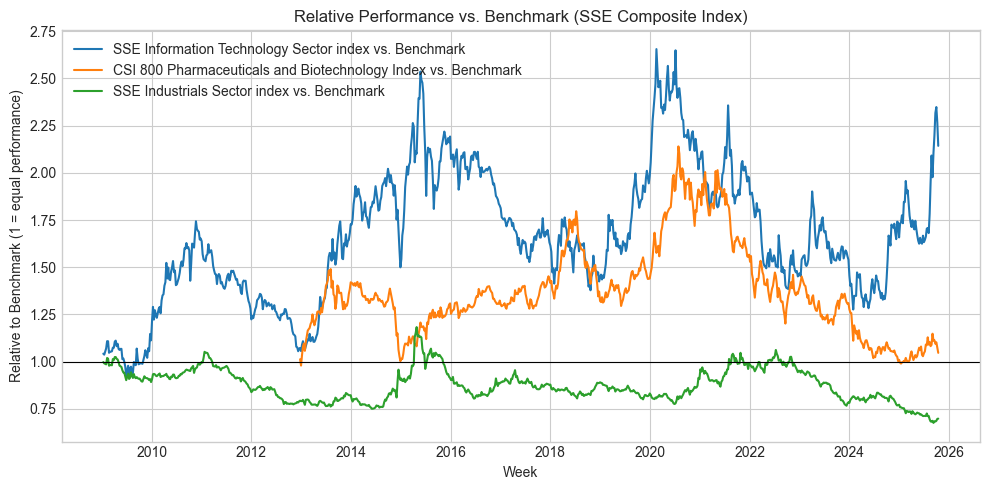

In [76]:
# ============================================================
# Relative Performance vs. Benchmark
# ============================================================

# Benchmark and subindices
codes = ['000001', '000039', '000841', '000034']  # Benchmark + selected subsectors
benchmark = '000001'  # SSE Composite Index

# Prepare data
df = merged_weekly[merged_weekly['IndexCode'].isin(codes)].copy()
df['Closing'] = pd.to_numeric(df['Closing'], errors='coerce')
df.loc[df['Closing'] <= 0, 'Closing'] = np.nan

# Split ISO year-week into numeric columns
df[['Year', 'Week']] = df['Date'].astype(str).str.split('-', expand=True).astype(int)

# Convert ISO week to actual start date (Monday)
df['WeekStart'] = df.apply(lambda r: pd.Timestamp.fromisocalendar(r['Year'], r['Week'], 1), axis=1)
df = df.sort_values(['IndexCode', 'WeekStart'])

# Compute weekly log returns
df['LogReturn'] = np.log(df['Closing']).groupby(df['IndexCode']).diff()

# Pivot table: rows = week, columns = index codes, values = log returns
pivot = df.pivot(index='WeekStart', columns='IndexCode', values='LogReturn').sort_index()

# Keep only weeks where the benchmark has data
pivot = pivot.dropna(subset=[benchmark])

# Compute relative performance (excess cumulative log return)
rel = {}
names = {}
for code in codes:
    if code == benchmark or code not in pivot:
        continue
    pair = pivot[[benchmark, code]].dropna()
    ex_ret = (pair[code] - pair[benchmark]).cumsum()   # cumulative excess log return
    rel_series = np.exp(ex_ret)                        # convert back from log scale
    rel[code] = rel_series
    # Extract readable name from metadata
    names[code] = df.loc[df['IndexCode'] == code, 'EnglishName'].dropna().iloc[0]

# Plot relative performance vs. benchmark
plt.figure(figsize=(10, 5))
for code, series in rel.items():
    plt.plot(series.index, series.values, label=f"{names[code]} vs. Benchmark")

plt.axhline(1.0, color='black', linewidth=0.8)
plt.title("Relative Performance vs. Benchmark (SSE Composite Index)", fontsize=12)
plt.ylabel("Relative to Benchmark (1 = equal performance)")
plt.xlabel("Week")
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
# ============================================================
# Export selected indices (convert ISO week → Friday)
# ============================================================
def iso_yearweek_to_friday(y: int, w: int) -> pd.Timestamp:
    """Convert ISO year-week (YYYY, WW) to actual Friday date."""
    return pd.Timestamp.fromisocalendar(int(y), int(w), 5)

export_codes = ["000001", "000039", "000037", "000034", "000841"]

for code in export_codes:
    sub = merged_weekly.loc[merged_weekly["IndexCode"] == code, ["Date", "Closing"]].dropna().copy()
    sub[["Year", "Week"]] = sub["Date"].astype(str).str.split("-", expand=True).astype(int)
    sub["Date"] = sub.apply(lambda r: iso_yearweek_to_friday(r["Year"], r["Week"]), axis=1)
    sub = sub[["Date", "Closing"]].rename(columns={"Closing": "Close"}).sort_values("Date").drop_duplicates("Date")
    out_name = f"{code}_index.csv"
    sub.to_csv(out_name, index=False)
    print(f"{out_name} saved ({len(sub)} rows)")

000001_index.csv saved (1766 rows)
000039_index.csv saved (859 rows)
000037_index.csv saved (859 rows)
000034_index.csv saved (859 rows)
000841_index.csv saved (658 rows)
